In [47]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tpg.agent import Agent, loadAgent
from tpg.utils import pathDepths, actionInstructionStats, learnerInstructionStats, getLearners, getTeams

def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')
    
ops = ["ADD", "SUB", "MULT", "DIV", "NEG", "COS"]

In [41]:
gp1_agent = loadAgent("run-data/gp/1/agent.pkl")
gp2_agent = loadAgent("run-data/gp/2/agent.pkl")
gp3_agent = loadAgent("run-data/gp/3/agent.pkl") # best

tpgsbb1_agent = loadAgent("run-data/tpgsbb/1/agent.pkl")
tpgsbb2_agent = loadAgent("run-data/tpgsbb/2/agent.pkl")
tpgsbb3_agent = loadAgent("run-data/tpgsbb/3/agent.pkl") # best

gp1 = pickle.load(open("run-data/gp/1/agent-scores.pkl", "rb"))
gp2 = pickle.load(open("run-data/gp/2/agent-scores.pkl", "rb"))
gp3 = pickle.load(open("run-data/gp/3/agent-scores.pkl", "rb"))
gp = gp1 + gp2 + gp3

tpgsbb1 = pickle.load(open("run-data/tpgsbb/1/agent-scores.pkl", "rb"))
tpgsbb2 = pickle.load(open("run-data/tpgsbb/2/agent-scores.pkl", "rb"))
tpgsbb3 = pickle.load(open("run-data/tpgsbb/3/agent-scores.pkl", "rb"))
tpgsbb = tpgsbb1 + tpgsbb2 + tpgsbb3

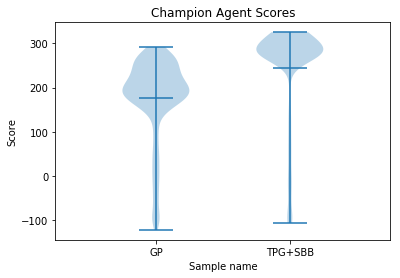

In [37]:
ax = plt.axes()

plt.violinplot((gp, tpgsbb), showmeans=True, points=3000)

plt.title("Champion Agent Scores")
plt.xlabel("Run Type")
plt.ylabel("Score")

set_axis_style(ax, ["GP", "TPG+SBB"])

plt.show()

In [80]:
# check the structures of the different agents in various ways GP first
print("GP 1\n")

print("Scores:")
print(f"Mean Score: {np.mean(gp1)}")
print(f"Std Score: {np.std(gp1)}\n")

print("Structure:")
print(f"Act Instructions: {actionInstructionStats(getLearners(gp1_agent.team), ops)}")


print("\n\nGP 2\n")

print("Scores:")
print(f"Mean Score: {np.mean(gp2)}")
print(f"Std Score: {np.std(gp2)}\n")

print("Structure:")
print(f"Act Instructions: {actionInstructionStats(getLearners(gp2_agent.team), ops)}")


print("\n\nGP 3\n")

print("Scores:")
print(f"Mean Score: {np.mean(gp3)}")
print(f"Std Score: {np.std(gp3)}\n")

print("Structure:")
print(f"Act Instructions: {actionInstructionStats(getLearners(gp3_agent.team), ops)}")


"""print(len(getLearners(gp3_agent.team)))
print(len(getLearners(tpgsbb3_agent.team)))

print(len(getTeams(gp3_agent.team)))
print(len(getTeams(tpgsbb3_agent.team)))

print(pathDepths(gp3_agent.team))
print(pathDepths(tpgsbb1_agent.team))
print(pathDepths(tpgsbb2_agent.team))
print(pathDepths(tpgsbb3_agent.team))

print(tpgsbb3_agent.team.id)
print(tpgsbb3_agent.team.learners)
print(tpgsbb3_agent.team.learners[0].getActionTeam().id)
print(tpgsbb3_agent.team.learners[0].getActionTeam().learners)
print(tpgsbb3_agent.team.learners[0].getActionTeam().learners[0].getActionTeam().id)
print(tpgsbb3_agent.team.learners[0].getActionTeam().learners[0].getActionTeam().learners)"""
pass

GP 1

Scores:
Mean Score: 222.43189267069135
Std Score: 90.89765850078881

Structure:
Act Instructions: {'overall': {'total': 32, 'min': 32, 'max': 32, 'avg': 32.0}, 'ADD': {'total': 6, 'min': 6, 'max': 6, 'avg': 6.0}, 'SUB': {'total': 6, 'min': 6, 'max': 6, 'avg': 6.0}, 'MULT': {'total': 5, 'min': 5, 'max': 5, 'avg': 5.0}, 'DIV': {'total': 7, 'min': 7, 'max': 7, 'avg': 7.0}, 'NEG': {'total': 3, 'min': 3, 'max': 3, 'avg': 3.0}, 'COS': {'total': 5, 'min': 5, 'max': 5, 'avg': 5.0}, 'numActPrograms': 1}


GP 2

Scores:
Mean Score: 127.73228271608879
Std Score: 109.45911801408722

Structure:
Act Instructions: {'overall': {'total': 33, 'min': 33, 'max': 33, 'avg': 33.0}, 'ADD': {'total': 4, 'min': 4, 'max': 4, 'avg': 4.0}, 'SUB': {'total': 5, 'min': 5, 'max': 5, 'avg': 5.0}, 'MULT': {'total': 10, 'min': 10, 'max': 10, 'avg': 10.0}, 'DIV': {'total': 5, 'min': 5, 'max': 5, 'avg': 5.0}, 'NEG': {'total': 4, 'min': 4, 'max': 4, 'avg': 4.0}, 'COS': {'total': 5, 'min': 5, 'max': 5, 'avg': 5.0}, 'n

In [90]:
# TPG+SBB

print("TPG+SBB 1\n")

print("Scores:")
print(f"Mean Score: {np.mean(tpgsbb1)}")
print(f"Std Score: {np.std(tpgsbb1)}\n")

print("Structure:")
print(f"Teams: {len(getTeams(tpgsbb1_agent.team))}")
print(f"Learners: {len(getLearners(tpgsbb1_agent.team))}")
print(f"Path Depths: {pathDepths(tpgsbb1_agent.team)}")

print(f"\nBid Instructions: {learnerInstructionStats(getLearners(tpgsbb1_agent.team), ops)}")
print(f"\nAct Instructions: {actionInstructionStats(getLearners(tpgsbb1_agent.team), ops)}")


print("\n\nTPG+SBB 2\n")

print("Scores:")
print(f"Mean Score: {np.mean(tpgsbb2)}")
print(f"Std Score: {np.std(tpgsbb2)}\n")

print("Structure:")
print(f"Teams: {len(getTeams(tpgsbb2_agent.team))}")
print(f"Learners: {len(getLearners(tpgsbb2_agent.team))}")
print(f"Path Depths: {pathDepths(tpgsbb2_agent.team)}")

print(f"\nBid Instructions: {learnerInstructionStats(getLearners(tpgsbb2_agent.team), ops)}")
print(f"\nAct Instructions: {actionInstructionStats(getLearners(tpgsbb2_agent.team), ops)}")


print("\n\nTPG+SBB 3\n")

print("Scores:")
print(f"Mean Score: {np.mean(tpgsbb3)}")
print(f"Std Score: {np.std(tpgsbb3)}\n")

print("Structure:")
print(f"Teams: {len(getTeams(tpgsbb3_agent.team))}")
print(f"Learners: {len(getLearners(tpgsbb3_agent.team))}")
print(f"Path Depths: {pathDepths(tpgsbb3_agent.team)}")

print(f"\nBid Instructions: {learnerInstructionStats(getLearners(tpgsbb3_agent.team), ops)}")
print(f"\nAct Instructions: {actionInstructionStats(getLearners(tpgsbb3_agent.team), ops)}")

TPG+SBB 1

Scores:
Mean Score: 194.31793346148294
Std Score: 139.32372412373883

Structure:
Teams: 6
Learners: 12
Path Depths: [1, 2, 3, 4, 5, 6]

Bid Instructions: {'overall': {'total': 366, 'min': 15, 'max': 57, 'avg': 30.5}, 'ADD': {'total': 56, 'min': 1, 'max': 9, 'avg': 4.666666666666667}, 'SUB': {'total': 72, 'min': 3, 'max': 12, 'avg': 6.0}, 'MULT': {'total': 57, 'min': 0, 'max': 9, 'avg': 4.75}, 'DIV': {'total': 58, 'min': 0, 'max': 9, 'avg': 4.833333333333333}, 'NEG': {'total': 62, 'min': 3, 'max': 9, 'avg': 5.166666666666667}, 'COS': {'total': 61, 'min': 2, 'max': 11, 'avg': 5.083333333333333}}

Act Instructions: {'overall': {'total': 294, 'min': 7, 'max': 50, 'avg': 24.5}, 'ADD': {'total': 54, 'min': 1, 'max': 13, 'avg': 4.5}, 'SUB': {'total': 50, 'min': 0, 'max': 12, 'avg': 4.166666666666666}, 'MULT': {'total': 58, 'min': 1, 'max': 10, 'avg': 4.833333333333333}, 'DIV': {'total': 38, 'min': 2, 'max': 8, 'avg': 3.166666666666667}, 'NEG': {'total': 41, 'min': 1, 'max': 9, 'avg